In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np

from spectrometer import FID1D, plot

cm = 1 / 2.54
figsize = (13.0*cm, 6.5*cm)  # Thesis: 16cm * 8cm

Did not find any configuration file. Using defaults.


In [2]:
# Load raw *.fid data
file = Path(
    "../data/20230825-142435-Water-1H-spin_echo,length=9us,delay_tau=100000us,record_length=130000.0,sample_rate=320000.0,probe=andrew.fid"
)
fid = FID1D.from_file(file)

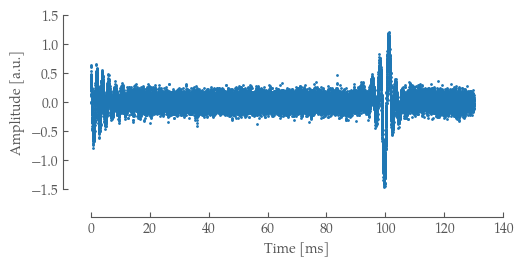

In [3]:
# Plot raw data
fig = fid.plot(figsize=figsize)
fig.savefig("spin_echo_raw.pdf")

/home/max/Projects/nmr-spectrometer/software/spectrometer/.venv/lib64/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


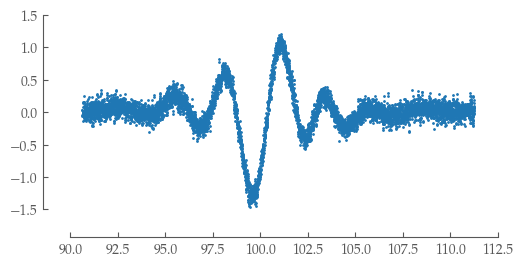

In [4]:
data = fid.data[29000:-6000]
scale = fid.ms_scale[29000:-6000]

fig, axes = plot.subplots(figsize=figsize)
axes.plot(scale, data, markersize=1, marker="o", linestyle="")

plot.format_axes(axes)
fig.savefig("spin_echo_avg.pdf")

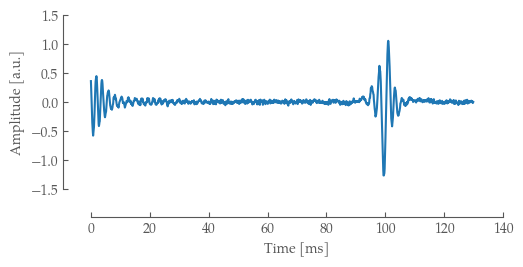

In [5]:
# moving average
window = 50
avg = np.convolve(fid.data, np.ones(window), "valid") / window
scale = fid.ms_scale[: -window + 1]

fig, axes = plot.subplots(figsize=figsize)
axes.plot(scale[::30], avg[::30].real, markersize=0, marker="o", linestyle="-")
axes.set_xlabel("Time [ms]")
axes.set_ylabel("Amplitude [a.u.]")

plot.format_axes(axes)
fig.savefig("spin_echo_avg.pdf")